# Word Cloud Sample Text Example

Description: This notebook shows you the basic steps when analyzing data in a notebook to get word cloud.You will learn how to load a data text file to a notebook, access this data file in an Object Storage, and then load the content of the data file into a String. Furthermore, you will learn how to explore and analyze the data in the Python and how to get Word Cloud using the matplotlib library.

First of we install Word Cloud Library in Python

In [89]:
!pip install wordcloud

In [90]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Set Credentials to Access Data

Because the text file is located in Object Storage, we need to define a helper function to access the data file contents that we loaded. Run the following cell to define the method get_file_content():

In [91]:
import requests, StringIO, json

def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containg the file content 
    from the associated Bluemix Object Storage V3."""

    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

##  Insert data source credentials

To add the credentials to access the text file which is stored in Object Storage, click the next code cell and select the Insert to code function below the data file in the Data Source pane in the notebook palette.

The credentials for accessing the Data Science.txt file are added to the cell as a Python dictionary. With these credentials, you can use the helper function to load the data file into a pandas.DataFrame.

Note: When you select the Insert to code function, a code cell with a dictionary is created for you. Adjust the credentials in the Python dictionary to correspond with the credentials inserted by the Insert to code function and run the dictionary code cell. The access credentials to the Object Storage instance in the dictionary are provided for convenience for later usage.

In [92]:
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_fc8e6ca3_d900_4112_a51b_1848be413706',
  'project_id':'5fd8cf3499414343a9d13c010d07e75b',
  'region':'dallas',
  'user_id':'26b69282b5544f86a524c384776ee544',
  'domain_id':'02ebc07bcaee4b8291a13186ec67c863',
  'domain_name':'1201113',
  'username':'admin_fa31943b7079ed7d8e8893b682855ed3fe5a59c4',
  'password':"""oHrLSES~14q.TYr4""",
  'filename':'Data Science.txt',
  'container':'notebooks',
  'tenantId':'sa8c-55acc6f2551847-91745ec8e9bd'
}

Here we call the function get_file_content() with credentions.This function will return us StringIO object.The we get the value of object into simple pyton string.

In [47]:
text= get_file_content(credentials_1)
s=text.getvalue()

# Stop Word Removal
Set the Stop words like in,on,and,has etc. by calling function set.

In [93]:
stopwords = set(STOPWORDS)
stopwords.add("said")

# Get Word Cloud of Text
Here we are getting the Word Cloud(frequancy) of words by calling the function generate. 

In [95]:
wc = WordCloud(background_color="black", max_words=10000,stopwords=stopwords, max_font_size=80, random_state=42)
wc.generate(s)

# Word Cloud Image
We are drawing the Word Cloud Image using matplotlib library.

(-0.5, 399.5, 199.5, -0.5)

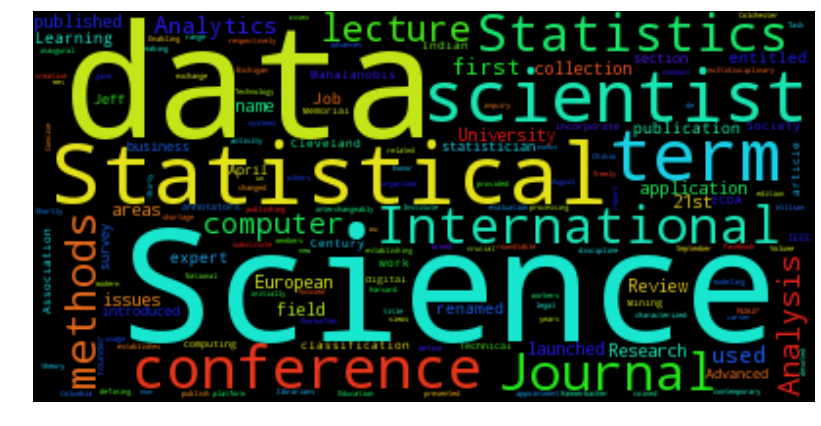

In [97]:
plt.figure( figsize=(15,7) )
plt.imshow(wc)
plt.axis("off")

# Conclusion

###  Most used word in this article are Science,Statistical,Data.

# Thanks!